In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix,make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
data_set = pd.read_csv('heart-disease.csv')
data_set.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [2]:

data_set= data_set.drop_duplicates()# Retrait des valeurs dupliquées
#Mis à l'échelle des données avec la méthode Robust scaling pour éviter l'impact des valeurs aberrantes

X = data_set.drop(columns='target')  
y = data_set['target']     

In [12]:
pipeline = Pipeline([

    ('nb', GaussianNB())  # Model step
])
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

results = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)
print(f"Mean Accuracy: {results['test_accuracy'].mean()}")
print(f"Mean Precision: {results['test_precision'].mean()}")
print(f"Mean Recall: {results['test_recall'].mean()}")
print(f"Mean F1-score: {results['test_f1'].mean()}")



Mean Accuracy: 0.8143169398907103
Mean Precision: 0.822900444938821
Mean Recall: 0.852571926765475
Mean F1-score: 0.8351713001435371


In [3]:
# Division de l'ensemble de données en données d'entrainement et en données de test

X_entrainement, X_test, y_entrainement, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

print(X_entrainement.shape)
print(X_test.shape)
print(y_entrainement.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


In [4]:
classifieur = GaussianNB() 
classifieur.fit(X_entrainement, y_entrainement)
print("Précision des prédictions: {:.2f}".format(classifieur.score(X_test, y_test)))

Précision des prédictions: 0.90


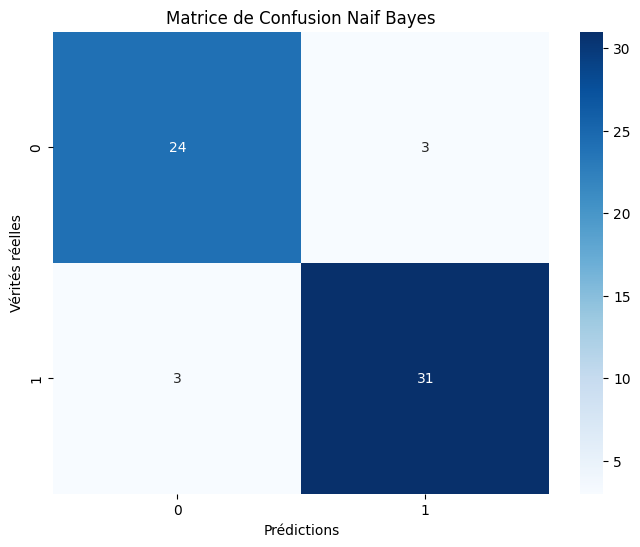

In [5]:
# predict and evaluate performance
def_y_pred = classifieur.predict(X_test)
matrice_confusion = confusion_matrix(y_test, def_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(matrice_confusion, annot=True, fmt='d', cmap='Blues')

plt.title('Matrice de Confusion Naif Bayes')
plt.xlabel('Prédictions')
plt.ylabel('Vérités réelles')
plt.show()

In [10]:
exactitude = accuracy_score(y_test,def_y_pred)
precision = precision_score(y_test,def_y_pred)
rappel = recall_score(y_test,def_y_pred)
print(f" Exactitude : { exactitude *100: .2f}")
print(f" precision : { precision *100: .2f}")
print(f" rappel : { rappel*100: .2f}")


 Exactitude :  90.16
 precision :  91.18
 rappel :  91.18


In [8]:
rapport = classification_report(y_test, def_y_pred, target_names=['Absence de maladie', 'Présence de maladie'])
print(rapport)

                     precision    recall  f1-score   support

 Absence de maladie       0.89      0.89      0.89        27
Présence de maladie       0.91      0.91      0.91        34

           accuracy                           0.90        61
          macro avg       0.90      0.90      0.90        61
       weighted avg       0.90      0.90      0.90        61



In [11]:
# Probabilités de la classe positive (présence de maladie)
y_probs = classifieur.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
print(f'AUC : {auc:.2f}')


AUC : 0.92


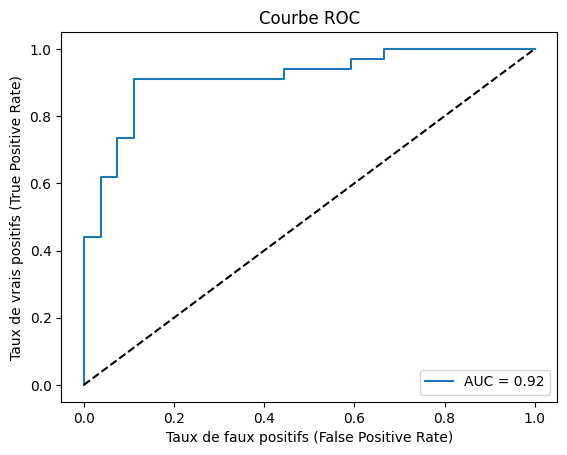

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Courbe aléatoire (ligne diagonale)
plt.xlabel('Taux de faux positifs (False Positive Rate)')
plt.ylabel('Taux de vrais positifs (True Positive Rate)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()